In [2]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

In [3]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

# Parameter Space (K 1-21, sigma = 0.01)

In [6]:
K_lst = np.arange(1, 22, 1)
tau = np.arange(60, 200, 10)

print(len(K_lst), len(tau))

21 14


In [7]:
path = '../results/highI/'
short_ktau005, long_ktau005 = pt.load_data(path+'H_SHORT_K1-22_TAU_th005_del700_sig01-20220713-220936-output.pickle',
                                      path+'H_LONG_K1-22_TAU_th005_del700_sig01-20220713-221649-output.pickle')
short_ktau01, long_ktau01 = pt.load_data(path+'H_SHORT_K1-22_TAU_th01_del700_sig01-20220713-211853-output.pickle',
                                      path+'H_LONG_K1-22_TAU_th01_del700_sig01-20220713-212842-output.pickle')
short_ktau02, long_ktau02 = pt.load_data(path+'H_SHORT_K1-22_TAU_th02_del700_sig01-20220713-220320-output.pickle',
                                      path+'H_LONG_K1-22_TAU_th02_del700_sig01-20220713-214541-output.pickle')

threshold 0.05
-5583.194231110766 11132.630745953255


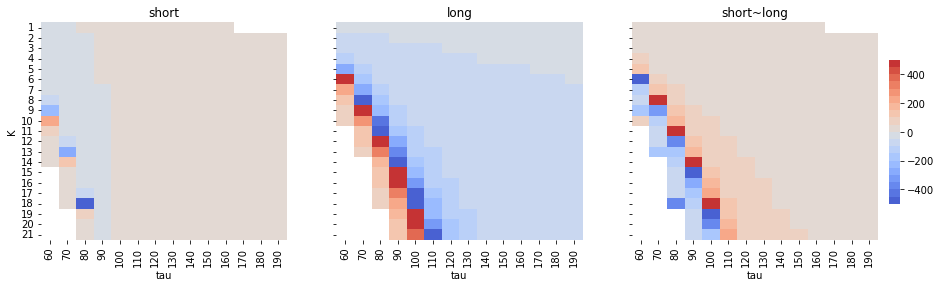

threshold 0.1
-12602.750356434164 25239.085596214987


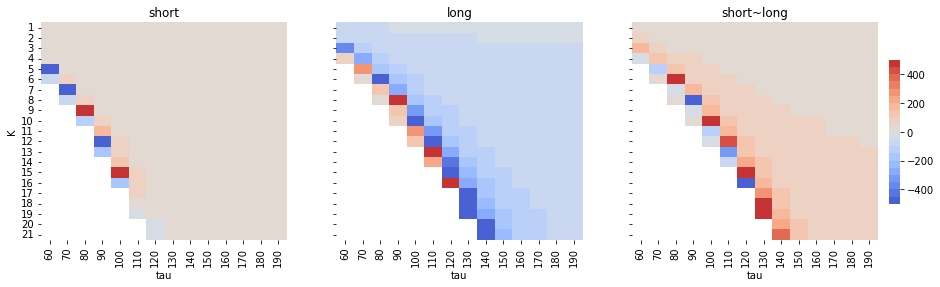

threshold 0.2
-1029.8959337582762 537.8367618333347


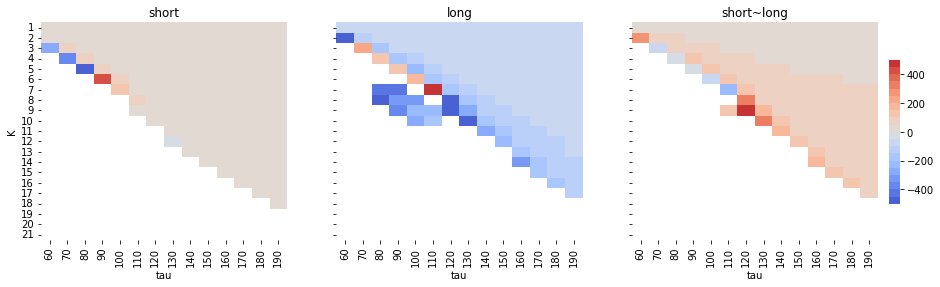

In [8]:
print('threshold', 0.05)
pt.plot_ind_point(short_ktau005, long_ktau005, K_lst, tau)
print('threshold', 0.1)
pt.plot_ind_point(short_ktau01, long_ktau01, K_lst, tau)
print('threshold', 0.2)
pt.plot_ind_point(short_ktau02, long_ktau02, K_lst, tau)

threshold 0.05
-0.7214663506501815 1.715225873581856


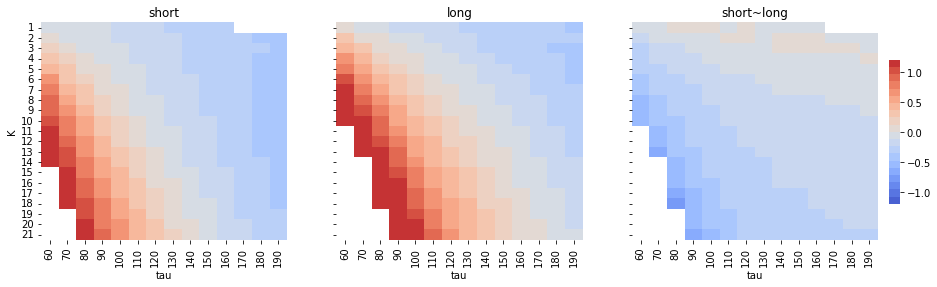

threshold 0.1
-0.773563661021133 1.6000267390859277


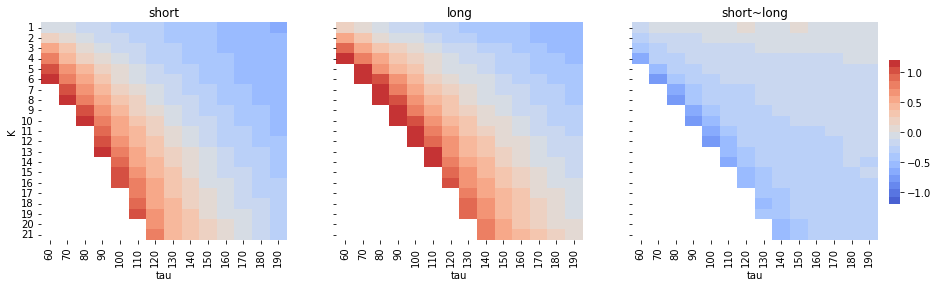

threshold 0.2
-0.7314583167722363 1.2118430283127026


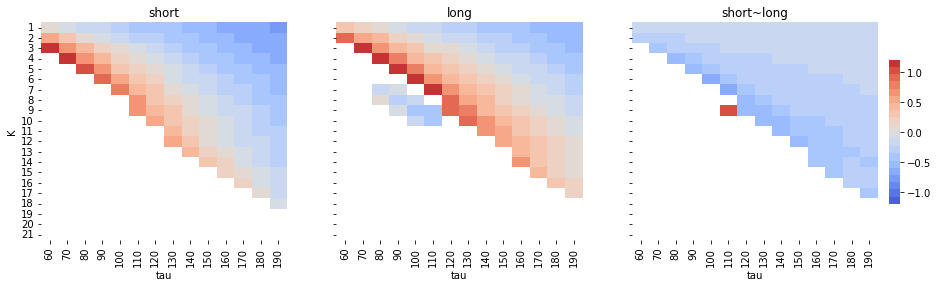

In [27]:
print('threshold', 0.05)
pt.plot_slope(short_ktau005, long_ktau005, K_lst, tau)
print('threshold', 0.1)
pt.plot_slope(short_ktau01, long_ktau01, K_lst, tau)
print('threshold', 0.2)
pt.plot_slope(short_ktau02, long_ktau02, K_lst, tau)

threshold 0.05
2698.9033818061816 104111.57864583857


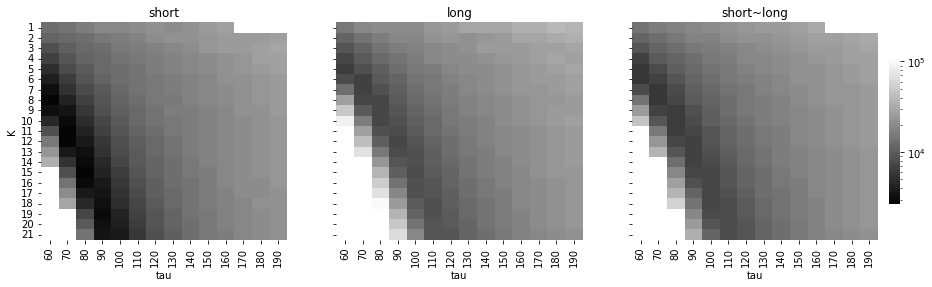

60 8
[(60, 8), (70, 11), (80, 15), (90, 19), (100, 21), (110, 21), (120, 21), (130, 21), (140, 21), (150, 21), (160, 21), (170, 21), (180, 21), (190, 19)]
60 5
[(60, 5), (70, 7), (80, 9), (90, 12), (100, 15), (110, 18), (120, 21), (130, 21), (140, 21), (150, 21), (160, 21), (170, 21), (180, 21), (190, 21)]


In [28]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau)

print(pt.get_opt_K(short_ktau005, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, mse=True))

threshold 0.05
1666.0267228442794 95464.60220348541


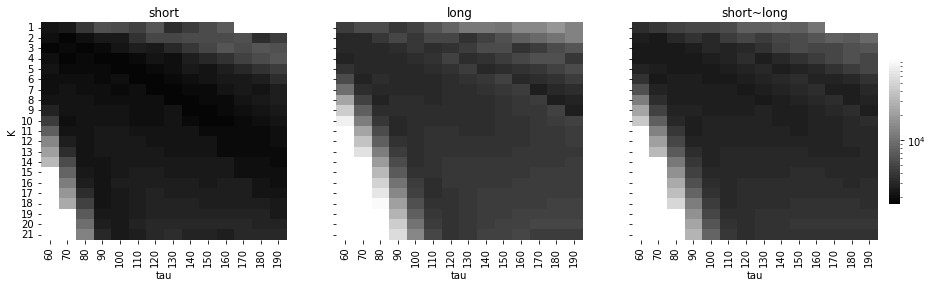

262.5059720575084 23443.75362455405


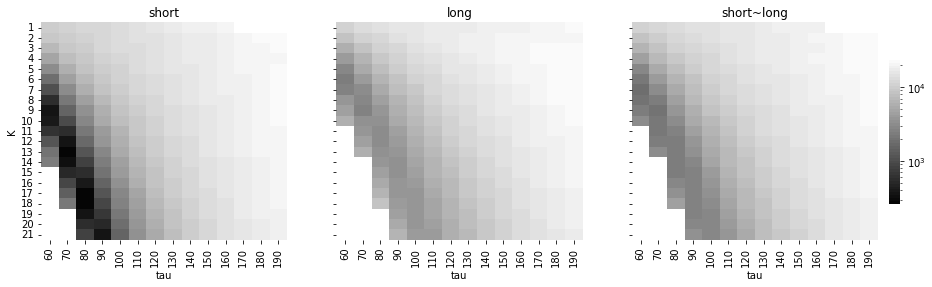

80 18
[(60, 9), (70, 13), (80, 18), (90, 21), (100, 21), (110, 21), (120, 21), (130, 21), (140, 21), (150, 21), (160, 21), (170, 21), (180, 21), (190, 21)]
60 6
[(60, 6), (70, 9), (80, 12), (90, 15), (100, 19), (110, 21), (120, 21), (130, 21), (140, 21), (150, 21), (160, 21), (170, 21), (180, 21), (190, 21)]


In [ ]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau, 'var')
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau, 'bias')

print(pt.get_opt_K(short_ktau005, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, bias=True))

0.8011427568142826
0.7774984661100846


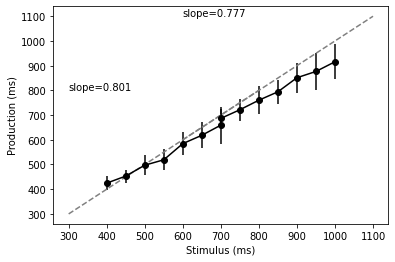

In [50]:
params = Params(ntrials=500, delay=700, tau=60, sigma=0.01, th=0.05, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

K = 8
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.7718189105460819
0.753797988803469


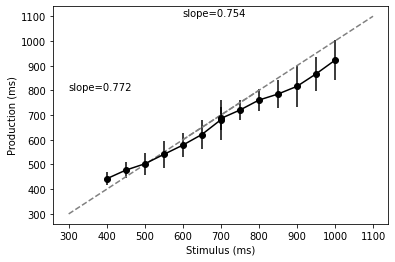

In [41]:
params = Params(ntrials=500, delay=700, tau=90, sigma=0.01, th=0.05, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

K = 19
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 12
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

In [ ]:
# short: 1.15-1.1
# long: 1.1-1.06

threshold 0.1
2238.26551257533 62939.41006521884


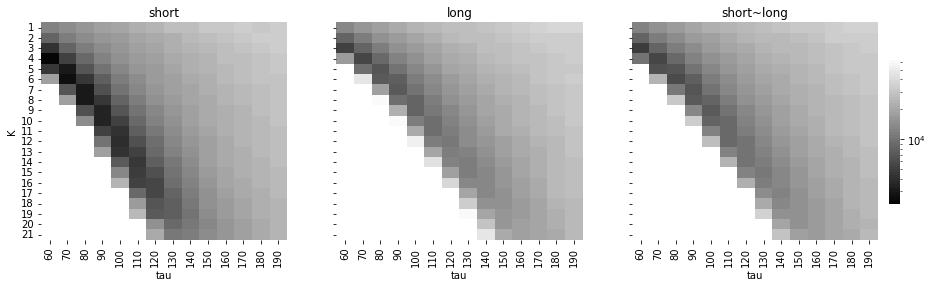

60 4
[(60, 4), (70, 6), (80, 8), (90, 10), (100, 12), (110, 14), (120, 17), (130, 18), (140, 19), (150, 20), (160, 21), (170, 21), (180, 21), (190, 20)]
60 3
[(60, 3), (70, 4), (80, 5), (90, 7), (100, 9), (110, 10), (120, 12), (130, 15), (140, 17), (150, 18), (160, 19), (170, 20), (180, 21), (190, 20)]


In [29]:
print('threshold', 0.1)
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau)

print(pt.get_opt_K(short_ktau01, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, mse=True))

0.7796301985044222
0.8357135773869426


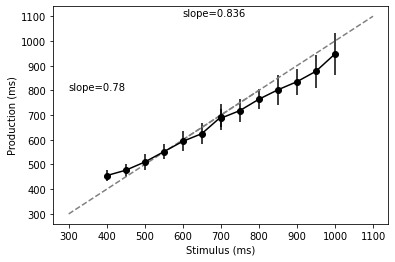

In [48]:
params = Params(ntrials=500, delay=700, tau=60, sigma=0.01, th=0.1, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

K = 4
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 3
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

threshold 0.2
3516.11713673756 290632.35846933443


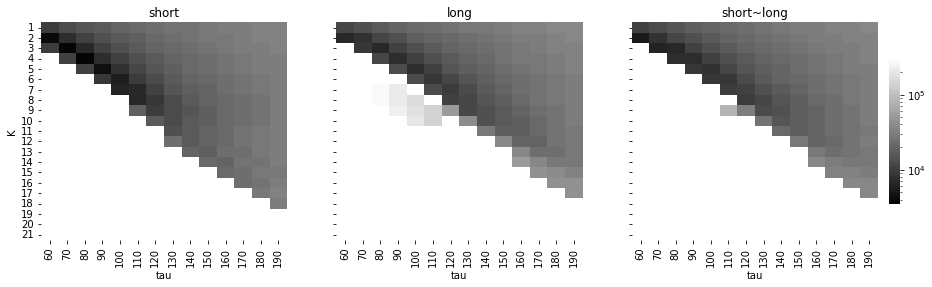

70 3
[(60, 2), (70, 3), (80, 4), (90, 5), (100, 6), (110, 8), (120, 8), (130, 8), (140, 9), (150, 13), (160, 14), (170, 15), (180, 14), (190, 15)]
60 2
[(60, 2), (70, 2), (80, 3), (90, 4), (100, 5), (110, 6), (120, 7), (130, 8), (140, 10), (150, 10), (160, 11), (170, 12), (180, 13), (190, 13)]


In [30]:
print('threshold', 0.2)
pt.plot_mse(short_ktau02, long_ktau02, K_lst, tau)

print(pt.get_opt_K(short_ktau02, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau02, K_lst, tau, mse=True))

0.6305926555986815
0.5039779456275619


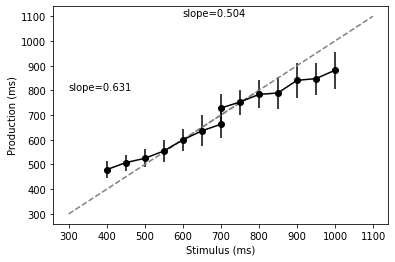

In [49]:
params = Params(ntrials=500, delay=700, tau=70, sigma=0.01, th=0.2, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

K = 3
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 2
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

0.5332883005749652
0.706913062842913


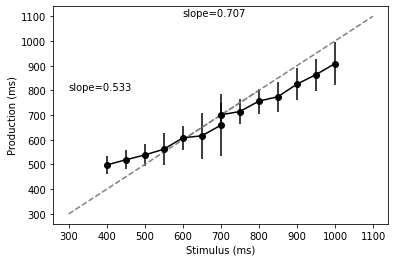

In [52]:
params = Params(ntrials=500, delay=700, tau=110, sigma=0.01, th=0.2, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

K = 8
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 6
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

threshold 0.05
251268.26219512196 605218.904


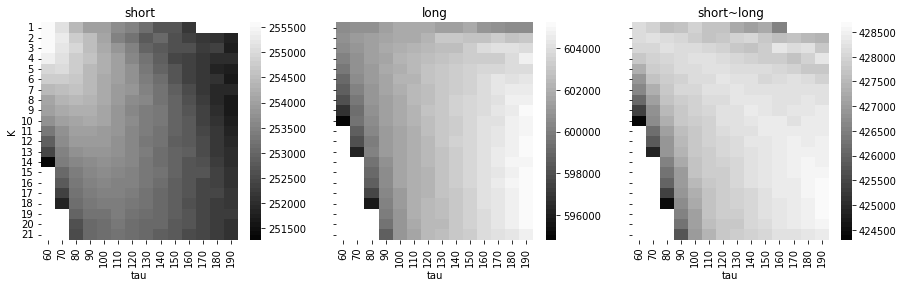

threshold 0.1
248812.16700201208 610144.1404958678


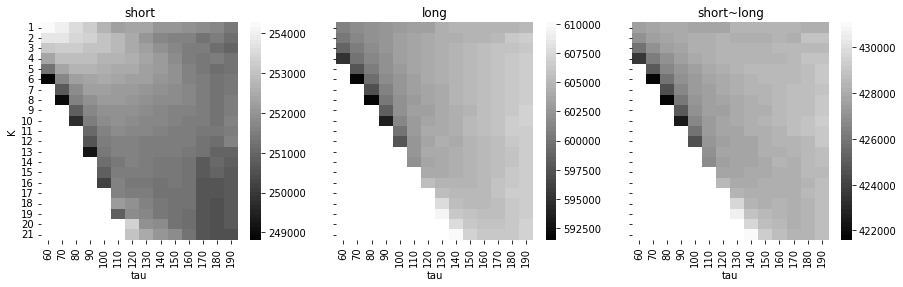

threshold 0.2
247725.13306451612 673801.5353535353


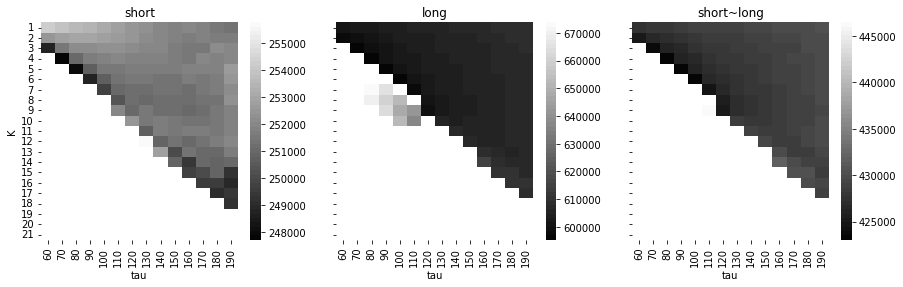

In [51]:
print('threshold', 0.05)
pt.plot_mse_total(short_ktau005, long_ktau005, K_lst, tau)
print('threshold', 0.1)
pt.plot_mse_total(short_ktau01, long_ktau01, K_lst, tau)
print('threshold', 0.2)
pt.plot_mse_total(short_ktau02, long_ktau02, K_lst, tau)

### reset unsymmetric

In [14]:
path = '../results/highI/'
short_ktau01, long_ktau01 = pt.load_data(path+'H2_SHORT_K1-22_TAU_th01_del700_sig01-20220713-140204-output.pickle',
                                      path+'H2_LONG_K1-22_TAU_th01_del700_sig01-20220713-134437-output.pickle')

-12602.750356434164 25239.085596214987


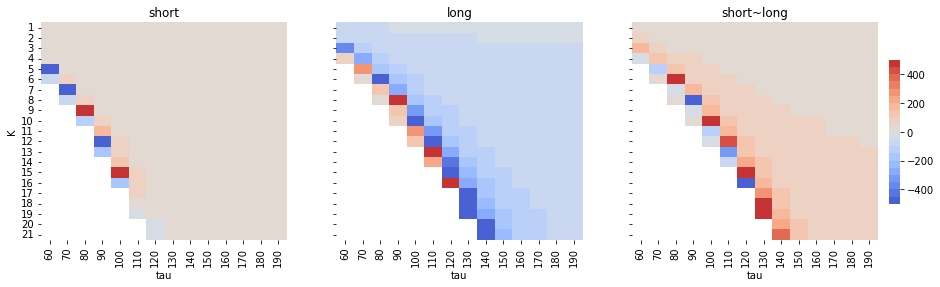

In [16]:
pt.plot_ind_point(short_ktau01, long_ktau01, K_lst, tau)

-0.773563661021133 1.6000267390859277


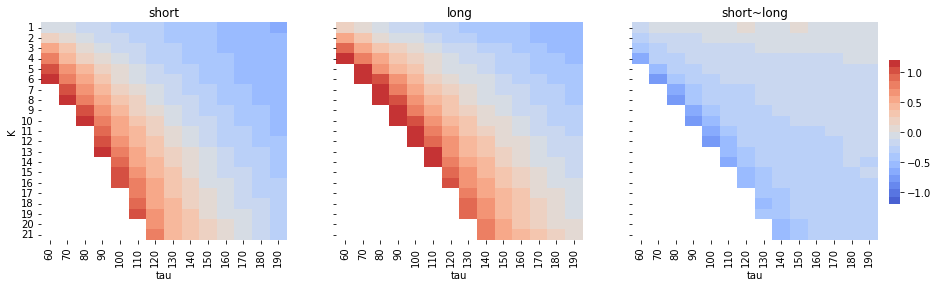

In [15]:
#print('threshold', 0.1)
pt.plot_slope(short_ktau01, long_ktau01, K_lst, tau)

2238.26551257533 62939.41006521884


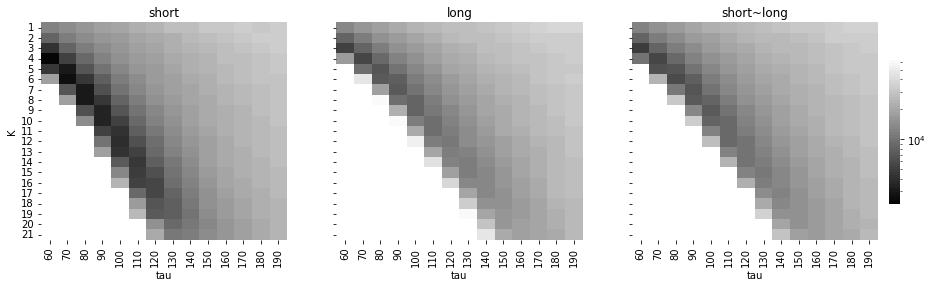

In [17]:
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau)

In [18]:
print(pt.get_opt_K(short_ktau01, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, mse=True))

60 4
[(60, 4), (70, 6), (80, 8), (90, 10), (100, 12), (110, 14), (120, 17), (130, 18), (140, 19), (150, 20), (160, 21), (170, 21), (180, 21), (190, 20)]
60 3
[(60, 3), (70, 4), (80, 5), (90, 7), (100, 9), (110, 10), (120, 12), (130, 15), (140, 17), (150, 18), (160, 19), (170, 20), (180, 21), (190, 20)]


/home/katharina/Documents/Studium/Master_NEURO/thesis/code/onetwogo/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.537354324169588


/home/katharina/Documents/Studium/Master_NEURO/thesis/code/onetwogo/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.5557179820972293


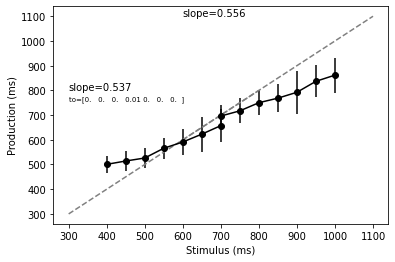

In [22]:
params = Params(ntrials=500, delay=700, tau=120, sigma=0.01, th=0.1, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

K = 17
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 12
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

248812.16700201208 610144.1404958678


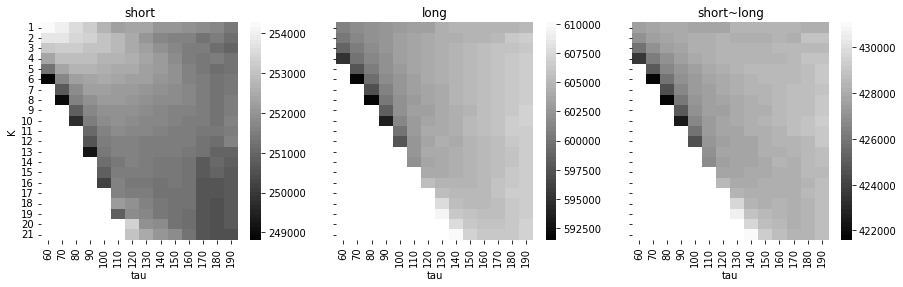

In [23]:
pt.plot_mse_total(short_ktau01, long_ktau01, K_lst, tau)